<a href="https://colab.research.google.com/github/Nikhil5566/Data-Science-Portfolio-Projects/blob/main/Indian%20Accident%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Indian Accident Dataset


# Indian Accident Dataset: Key Insights and Predictive Analytics

This analysis delved into the Indian Accident Dataset to uncover patterns and relationships within accident data, focusing on demographic factors, regional distributions, and the development of a predictive model for accident risk.

### Understanding Accident Distribution

Initial exploratory data analysis revealed several crucial insights:

*   **Geographical Concentration**: The dataset indicates that accidents are predominantly concentrated in 'State' regions, accounting for a massive 390,988 incidents. This is significantly higher than 'City' regions (53,486) and 'Union Territories' (6,509). This suggests that broader state-level jurisdictions, potentially due to larger road networks or varied conditions, experience a higher volume of accidents.

*   **High-Risk Regions**: Specifically, Maharashtra stands out with the highest number of accidents (58,233), followed by Madhya Pradesh (40,508) and Uttar Pradesh (36,521). These states emerge as critical areas requiring focused intervention and safety measures to curb accident rates.

*   **Gender Disparity**: A striking observation is the significant gender imbalance in accident involvement. Males are involved in accidents far more frequently, totaling 367,894 incidents, compared to females with 83,089. This stark difference highlights a demographic group that might be exposed to higher risk factors.

*   **Age Group Vulnerability**: The working-age population (18-60 years) appears to be the most vulnerable. The 30-45 age group recorded the highest number of accidents (139,309), closely followed by 18-30 (112,823) and 45-60 (102,284). Conversely, younger individuals (0-14 years) and seniors (60+ years) show considerably lower involvement.

### Predictive Modeling for Accident Risk

To further understand and predict accident occurrences, a machine learning model was developed. The `Total_Accidents_Region` was chosen as the target variable for prediction, and features such as `Male_Ratio`, `Region_Risk_Score`, and `Type_Risk_Score` were engineered.

A **RandomForestRegressor** model was trained and evaluated:

*   **High Accuracy**: The model demonstrated remarkable predictive capabilities, achieving an R-squared score of **98.2%**. This indicates that the model can explain a very high percentage of the variance in total accidents per region, making it highly reliable for risk assessment.

*   **Low Error**: The Mean Absolute Error (MAE) for the model was **875.35**. This means, on average, the model's predictions for total accidents deviate by approximately 875.35 from the actual values, which is relatively low given the scale of accident numbers.

*   **Feature Importance**: While specific feature importances need detailed visualization, the model inherently identifies which engineered features contribute most to its predictions. This allows for pinpointing the most influential factors driving accident totals, which can guide targeted prevention strategies.

### Overall Implications

The insights from this analysis are invaluable for developing data-driven accident prevention strategies. Efforts should be concentrated on high-risk states and age groups, particularly working-age males. The predictive model offers a robust tool for forecasting accident volumes, enabling authorities to allocate resources more effectively and implement proactive safety measures tailored to specific regions and demographics. This comprehensive understanding empowers stakeholders to move beyond reactive responses to a more predictive and preventive approach to road safety.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Installing Kaggle API
!pip install -q kaggle

# Uploading kaggle.json
from google.colab import files
files.upload()

# Moving kaggle.json to ~/.kaggle/
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Downloading the dataset using Kaggle API
!kaggle datasets download -d adarsh2626/indian-accident-dataset

# Unziping the downloaded file
!unzip indian-accident-dataset.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/adarsh2626/indian-accident-dataset
License(s): apache-2.0
  0% 0.00/2.57k [00:00<?, ?B/s]
100% 2.57k/2.57k [00:00<00:00, 7.96MB/s]
Archive:  indian-accident-dataset.zip
  inflating: Indian-Accident-Dataset.csv  


# Data Inspection

In [3]:
df = pd.read_csv('Indian-Accident-Dataset.csv')
df.head(11)

,Type,Region,Male(0-14),Female(0-14),Male(14-18),Female(14-18),Male(18-30),Female(18-30),Male(30-45),Female(30-45),Male(45-60),Female(45-60),Male(60+),Female(60+)
0,State,Andhra Pradesh,299,157,582,105,3268,437,4622,687,3324,662,1422,479
1,State,Arunachal Pradesh,10,6,7,5,148,19,135,16,35,3,5,2
2,State,Assam,103,43,259,84,1234,250,1357,268,601,134,152,39
3,State,Bihar,1113,444,1816,543,3777,1059,2679,922,1668,477,741,166
4,State,Chhattisgarh,738,470,674,321,3876,1067,4006,1005,2814,763,1277,511
5,State,Goa,5,3,6,2,153,15,161,19,115,15,76,26
6,State,Gujarat,380,215,751,205,4564,924,6472,984,4662,716,1746,432
7,State,Haryana,261,137,401,184,4155,720,4686,695,2807,315,915,215
8,State,Himachal Pradesh,54,38,68,25,599,96,840,127,706,102,275,73
9,State,Jharkhand,137,45,851,148,1875,332,1770,342,1033,285,402,148


In [4]:
df.tail(11)

,Type,Region,Male(0-14),Female(0-14),Male(14-18),Female(14-18),Male(18-30),Female(18-30),Male(30-45),Female(30-45),Male(45-60),Female(45-60),Male(60+),Female(60+)
78,City,Ranchi,2,0,46,11,42,27,28,22,36,25,97,33
79,City,Srinagar,3,0,2,0,31,19,45,3,50,9,16,2
80,City,Surat,33,22,40,18,498,62,797,82,429,72,193,42
81,City,Thiruvananthapuram,6,4,3,3,51,4,149,13,186,29,114,40
82,City,Thrissur,22,12,7,1,65,8,111,14,218,33,187,54
83,City,Tiruchirappalli,5,0,1,1,27,2,48,6,46,8,38,15
84,City,Vadodara,7,5,8,3,125,16,189,28,191,26,90,19
85,City,Varanasi,0,0,23,6,82,61,82,41,41,17,27,5
86,City,Vasai Virar,24,16,26,3,149,46,269,53,169,32,76,32
87,City,Vijayawada,13,3,16,2,109,10,130,22,135,37,64,24


In [5]:
df.shape

(89, 14)

In [6]:
df.columns

Index(['Type', 'Region', 'Male(0-14)', 'Female(0-14)', 'Male(14-18)',
       'Female(14-18)', 'Male(18-30)', 'Female(18-30)', 'Male(30-45)',
       'Female(30-45)', 'Male(45-60)', 'Female(45-60)', 'Male(60+)',
       'Female(60+)'],
      dtype='object')

In [8]:
df.dtypes

,0
Type,object
Region,object
Male(0-14),int64
Female(0-14),int64
Male(14-18),int64
Female(14-18),int64
Male(18-30),int64
Female(18-30),int64
Male(30-45),int64
Female(30-45),int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Type           89 non-null     object
 1   Region         89 non-null     object
 2   Male(0-14)     89 non-null     int64 
 3   Female(0-14)   89 non-null     int64 
 4   Male(14-18)    89 non-null     int64 
 5   Female(14-18)  89 non-null     int64 
 6   Male(18-30)    89 non-null     int64 
 7   Female(18-30)  89 non-null     int64 
 8   Male(30-45)    89 non-null     int64 
 9   Female(30-45)  89 non-null     int64 
 10  Male(45-60)    89 non-null     int64 
 11  Female(45-60)  89 non-null     int64 
 12  Male(60+)      89 non-null     int64 
 13  Female(60+)    89 non-null     int64 
dtypes: int64(12), object(2)
memory usage: 9.9+ KB


In [10]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Type,89,3,City,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,89,89,Andhra Pradesh,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Male(0-14),89.0,NaN,NaN,NaN,125.842697,303.858479,0.0,5.0,13.0,61.0,2016.0
Female(0-14),89.0,NaN,NaN,NaN,67.382022,167.965669,0.0,3.0,8.0,33.0,1112.0
Male(14-18),89.0,NaN,NaN,NaN,223.11236,513.075075,0.0,8.0,25.0,76.0,2571.0
Female(14-18),89.0,NaN,NaN,NaN,65.303371,154.03301,0.0,2.0,8.0,24.0,908.0
Male(18-30),89.0,NaN,NaN,NaN,1047.651685,2065.223904,0.0,69.0,148.0,599.0,9897.0
Female(18-30),89.0,NaN,NaN,NaN,220.022472,479.600496,0.0,12.0,30.0,105.0,2626.0
Male(30-45),89.0,NaN,NaN,NaN,1314.775281,2640.097212,0.0,96.0,186.0,840.0,16103.0
Female(30-45),89.0,NaN,NaN,NaN,250.494382,522.150756,0.0,15.0,41.0,117.0,2844.0


In [11]:
df.isnull().sum()

,0
Type,0
Region,0
Male(0-14),0
Female(0-14),0
Male(14-18),0
Female(14-18),0
Male(18-30),0
Female(18-30),0
Male(30-45),0
Female(30-45),0


In [12]:
df.duplicated().sum()

np.int64(0)

# Univariate Analysis

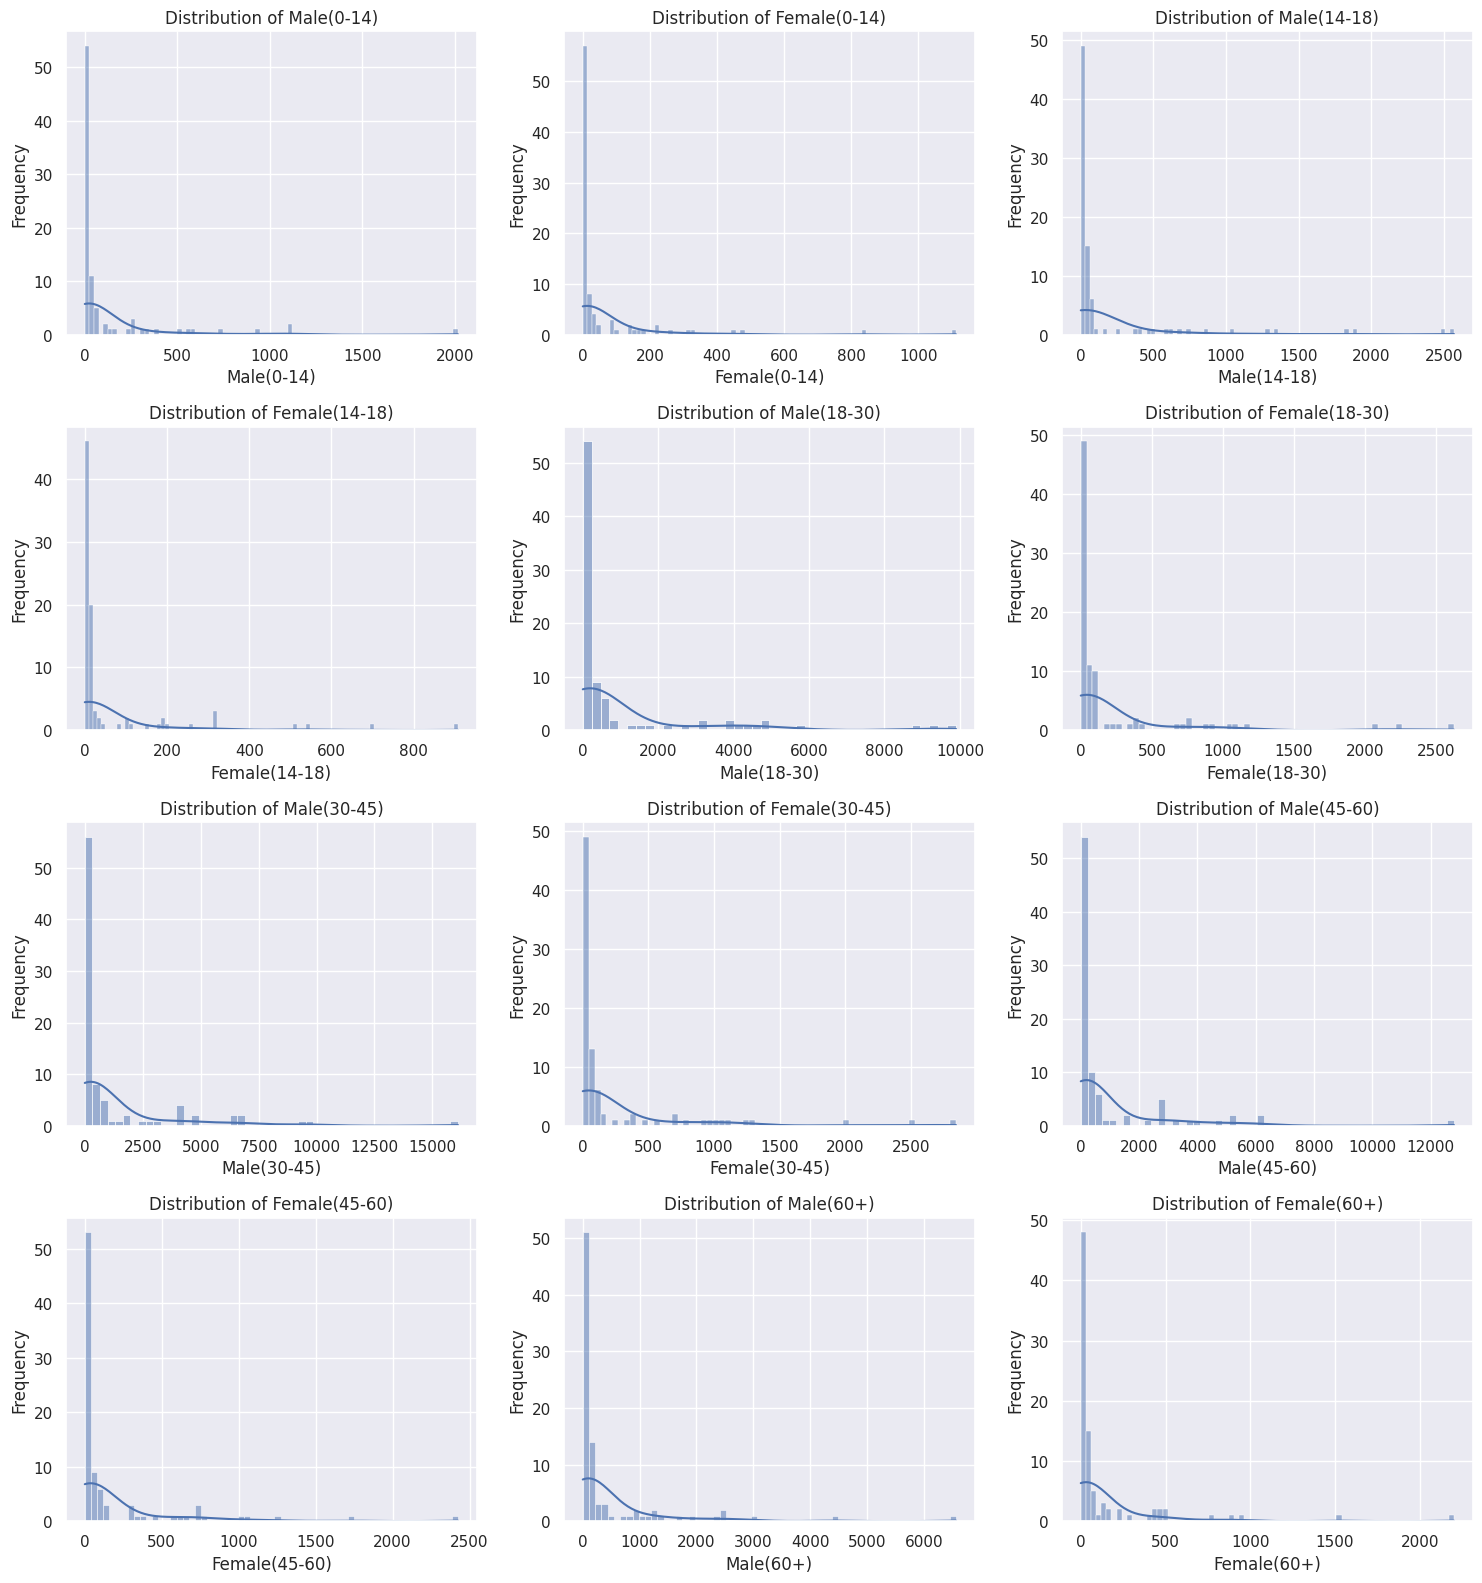

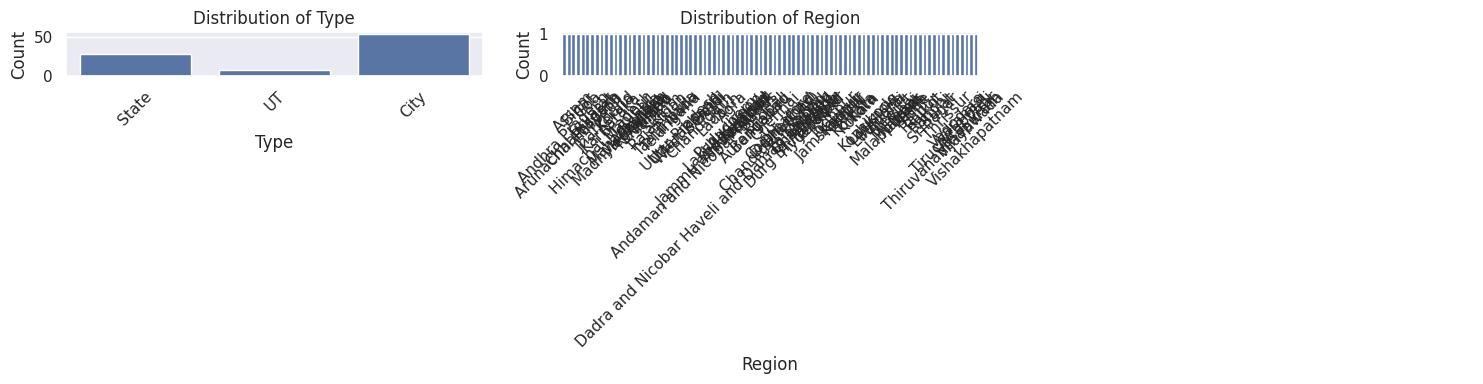

--- Categorical Value Counts ---

Value counts for Type:
Type
City     53
State    28
UT        8
Name: count, dtype: int64

Value counts for Region:
Region
Andhra Pradesh       1
Arunachal Pradesh    1
Assam                1
Bihar                1
Chhattisgarh         1
                    ..
Vadodara             1
Varanasi             1
Vasai Virar          1
Vijayawada           1
Vishakhapatnam       1
Name: count, Length: 89, dtype: int64


In [13]:
import math

# --- 1. Numerical Columns (Histograms in a Grid) ---
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

if len(numerical_cols) > 0:
    # Define grid size
    num_plots = len(numerical_cols)
    num_cols = 3  # You can change this to 2 or 4 if preferred
    num_rows = math.ceil(num_plots / num_cols)

    # Create figure and axes
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))
    axes = axes.flatten()  # Flatten to 1D array for easy iteration

    # Iterate and plot
    for i, col in enumerate(numerical_cols):
        sns.histplot(data=df, x=col, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    # Hidding any unused subplots (if total plots < grid cells)
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found.")


# --- 2. Categorical Columns (Countplots in a Grid) ---
categorical_cols = df.select_dtypes(include='object').columns.tolist()

if len(categorical_cols) > 0:
    # Define grid size
    num_plots = len(categorical_cols)
    num_cols = 3
    num_rows = math.ceil(num_plots / num_cols)

    # Create figure and axes
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))
    axes = axes.flatten()

    # Iterate and plot
    for i, col in enumerate(categorical_cols):
        sns.countplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

    # --- 3. Value Counts (Text Output) ---
    print("--- Categorical Value Counts ---")
    for col in categorical_cols:
        print(f"\nValue counts for {col}:")
        print(df[col].value_counts())
else:
    print("No categorical columns found.")

# Bivariate Analysis

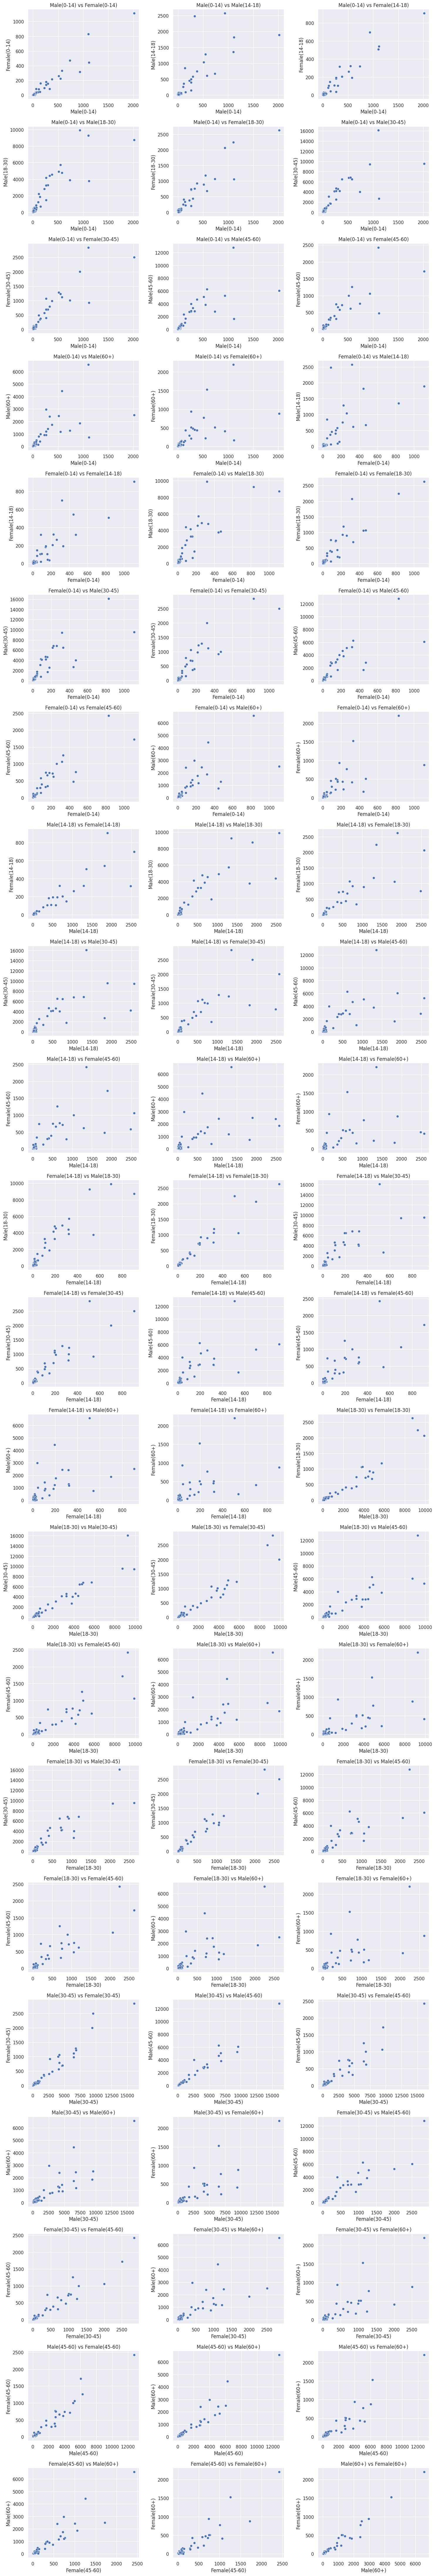

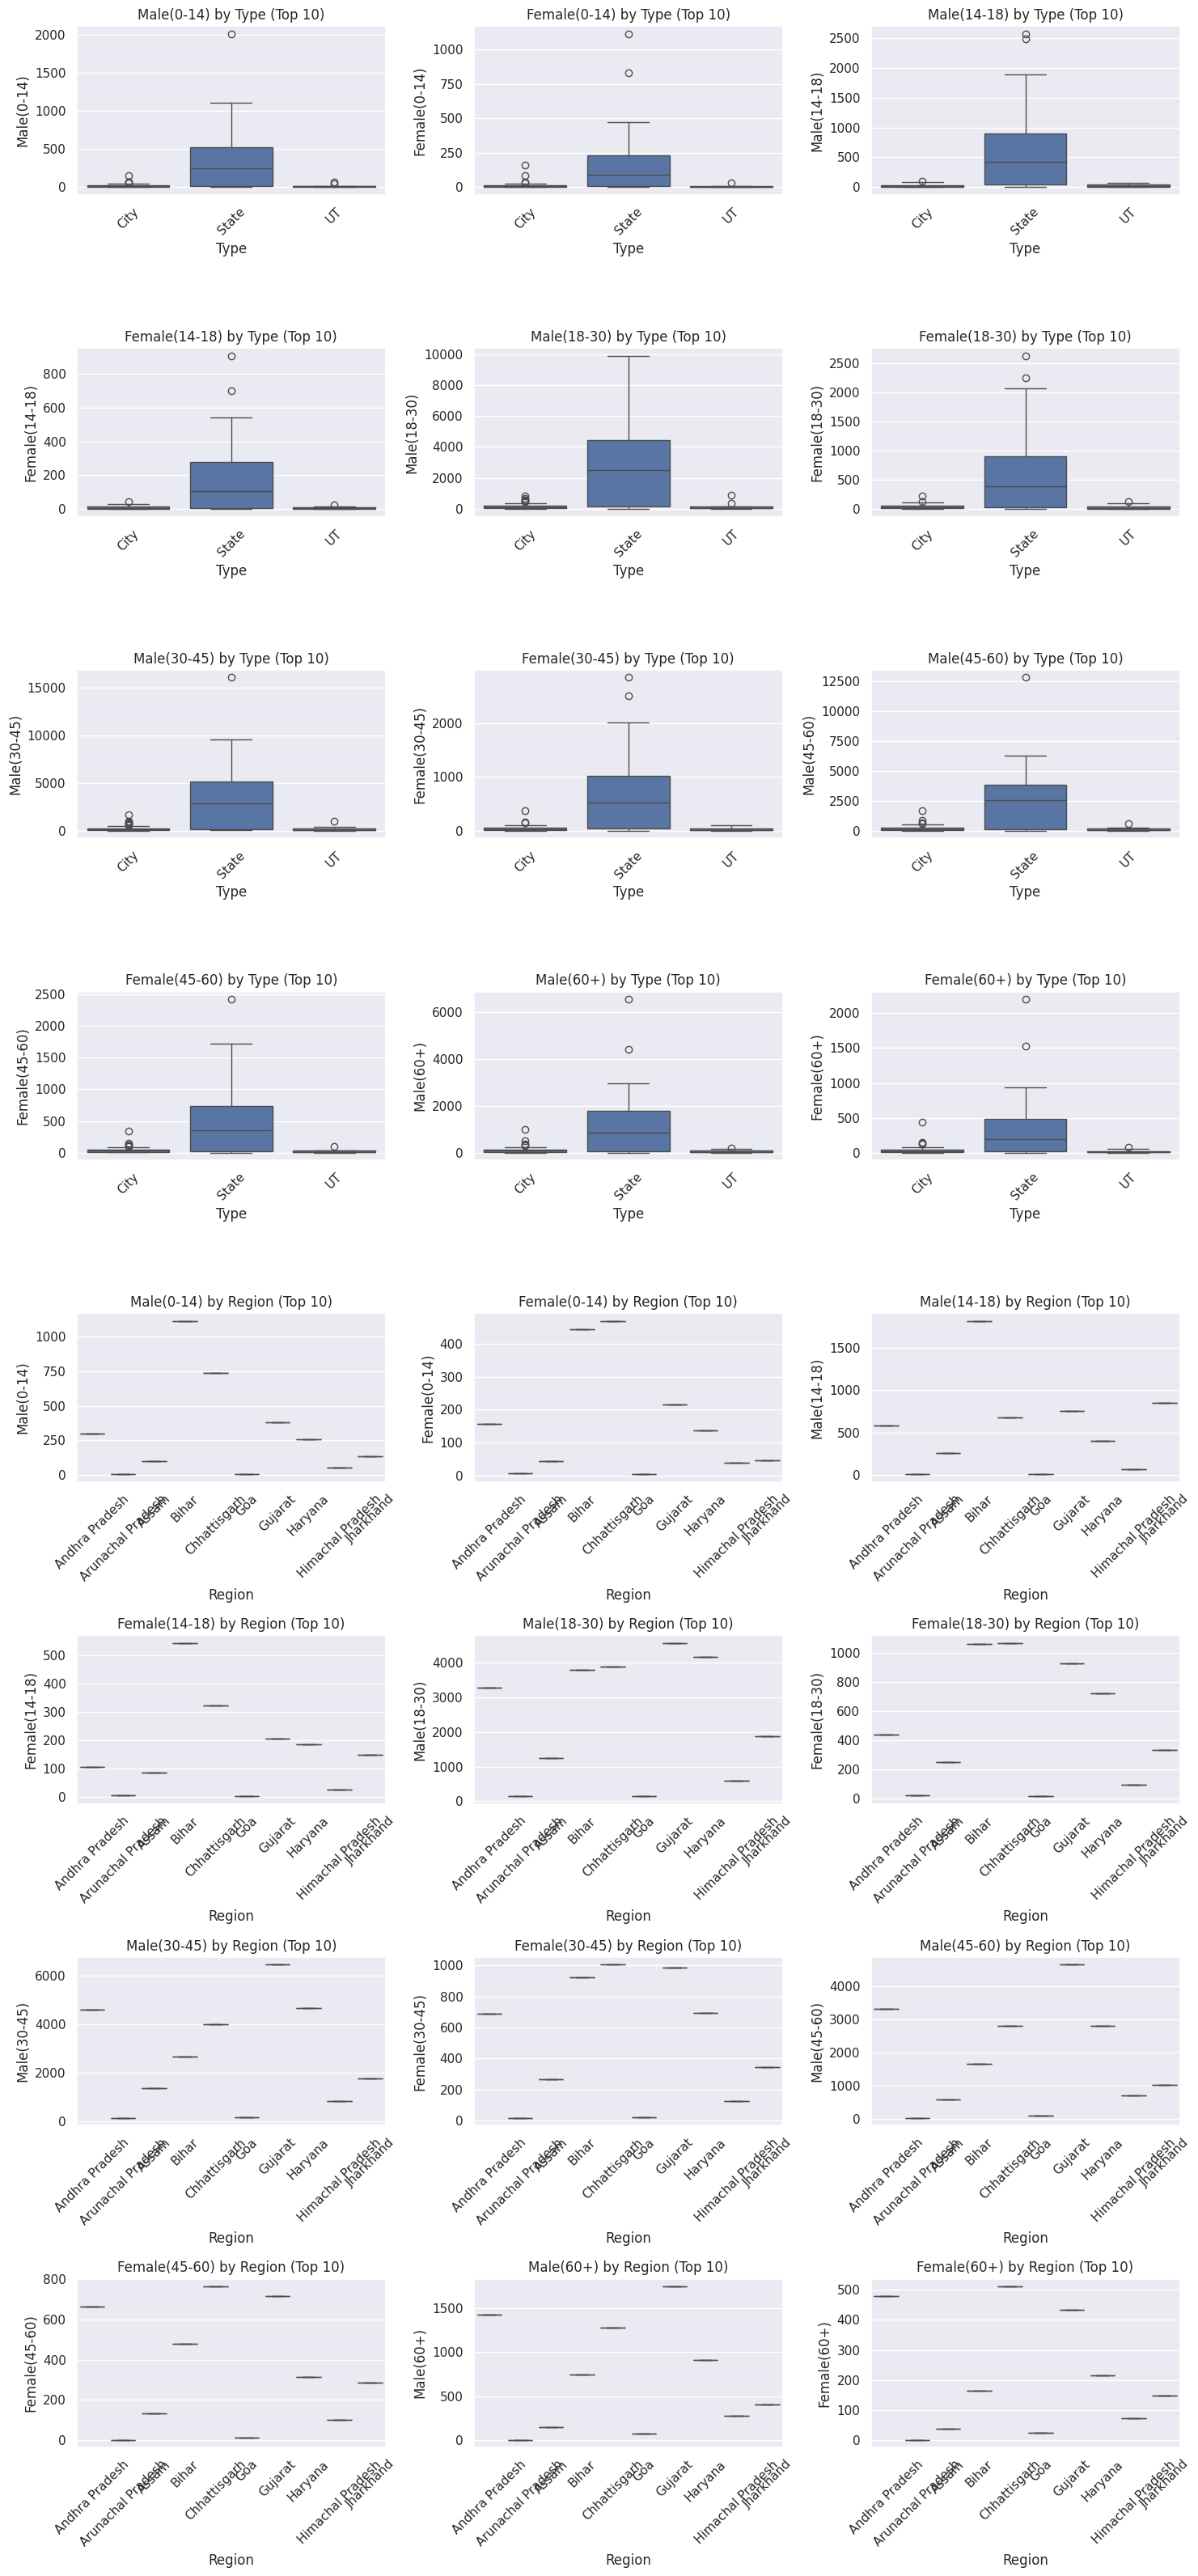

In [14]:
import itertools

# --- 1. Numerical-Numerical Relationships (Scatter Plots) ---
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Generate all unique pairs of numerical columns
num_pairs = list(itertools.combinations(numerical_cols, 2))

if len(num_pairs) > 0:
    # Define grid size
    num_plots = len(num_pairs)
    num_cols = 3
    num_rows = math.ceil(num_plots / num_cols)

    # Create figure and axes
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))

    # Ensure axes is always a 1D array of Axes objects for consistent iteration
    if not isinstance(axes, np.ndarray):
        axes = np.array([axes]) # If it's a single Axes object (e.g., 1x1 plot), make it an array
    else:
        axes = axes.flatten() # Flatten if it's already an array (1D or 2D)

    # Iterate through pairs and plot
    for i, (col1, col2) in enumerate(num_pairs):
        # Only plot if there's an available Axes object in the flattened array
        if i < len(axes):
            sns.scatterplot(data=df, x=col1, y=col2, ax=axes[i])
            axes[i].set_title(f'{col1} vs {col2}')
            axes[i].set_xlabel(col1)
            axes[i].set_ylabel(col2)
        else:
            break # Stop if we run out of axes (shouldn't happen with correct num_rows/cols)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Not enough numerical columns for scatter plots.")


# --- 2. Categorical-Numerical Relationships (Box Plots) ---
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Generate all pairs of (Categorical, Numerical)
cat_num_pairs = list(itertools.product(categorical_cols, numerical_cols))

if len(cat_num_pairs) > 0:
    # Define grid size
    num_plots = len(cat_num_pairs)
    num_cols = 3
    num_rows = math.ceil(num_plots / num_cols)

    # Create figure and axes
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))

    # Ensure axes is always a 1D array of Axes objects for consistent iteration
    if not isinstance(axes, np.ndarray):
        axes = np.array([axes])
    else:
        axes = axes.flatten()

    # Iterate through pairs and plot
    for i, (cat_col, num_col) in enumerate(cat_num_pairs):
        if i < len(axes):
            # 1. Get top 10 categories based on frequency
            top_categories = df[cat_col].value_counts().nlargest(10).index.tolist()

            # 2. Filter data: Keep only top categories AND ensure numerical column is not NaN
            filtered_df = df[df[cat_col].isin(top_categories) & df[num_col].notnull()]

            # 3. Update 'order' to only include categories that exist in the filtered data
            # This prevents the ValueError where a category in 'order' has no data to plot
            valid_categories = [cat for cat in top_categories if cat in filtered_df[cat_col].unique()]

            if valid_categories:
                sns.boxplot(data=filtered_df, x=cat_col, y=num_col, ax=axes[i], order=valid_categories)
                axes[i].set_title(f'{num_col} by {cat_col} (Top 10)')
                axes[i].set_xlabel(cat_col)
                axes[i].set_ylabel(num_col)
                axes[i].tick_params(axis='x', rotation=45)
            else:
                 axes[i].text(0.5, 0.5, "No valid data", ha='center', va='center', transform=axes[i].transAxes)
        else:
            break

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No categorical-numerical pairs found.")

# Pair-Plot

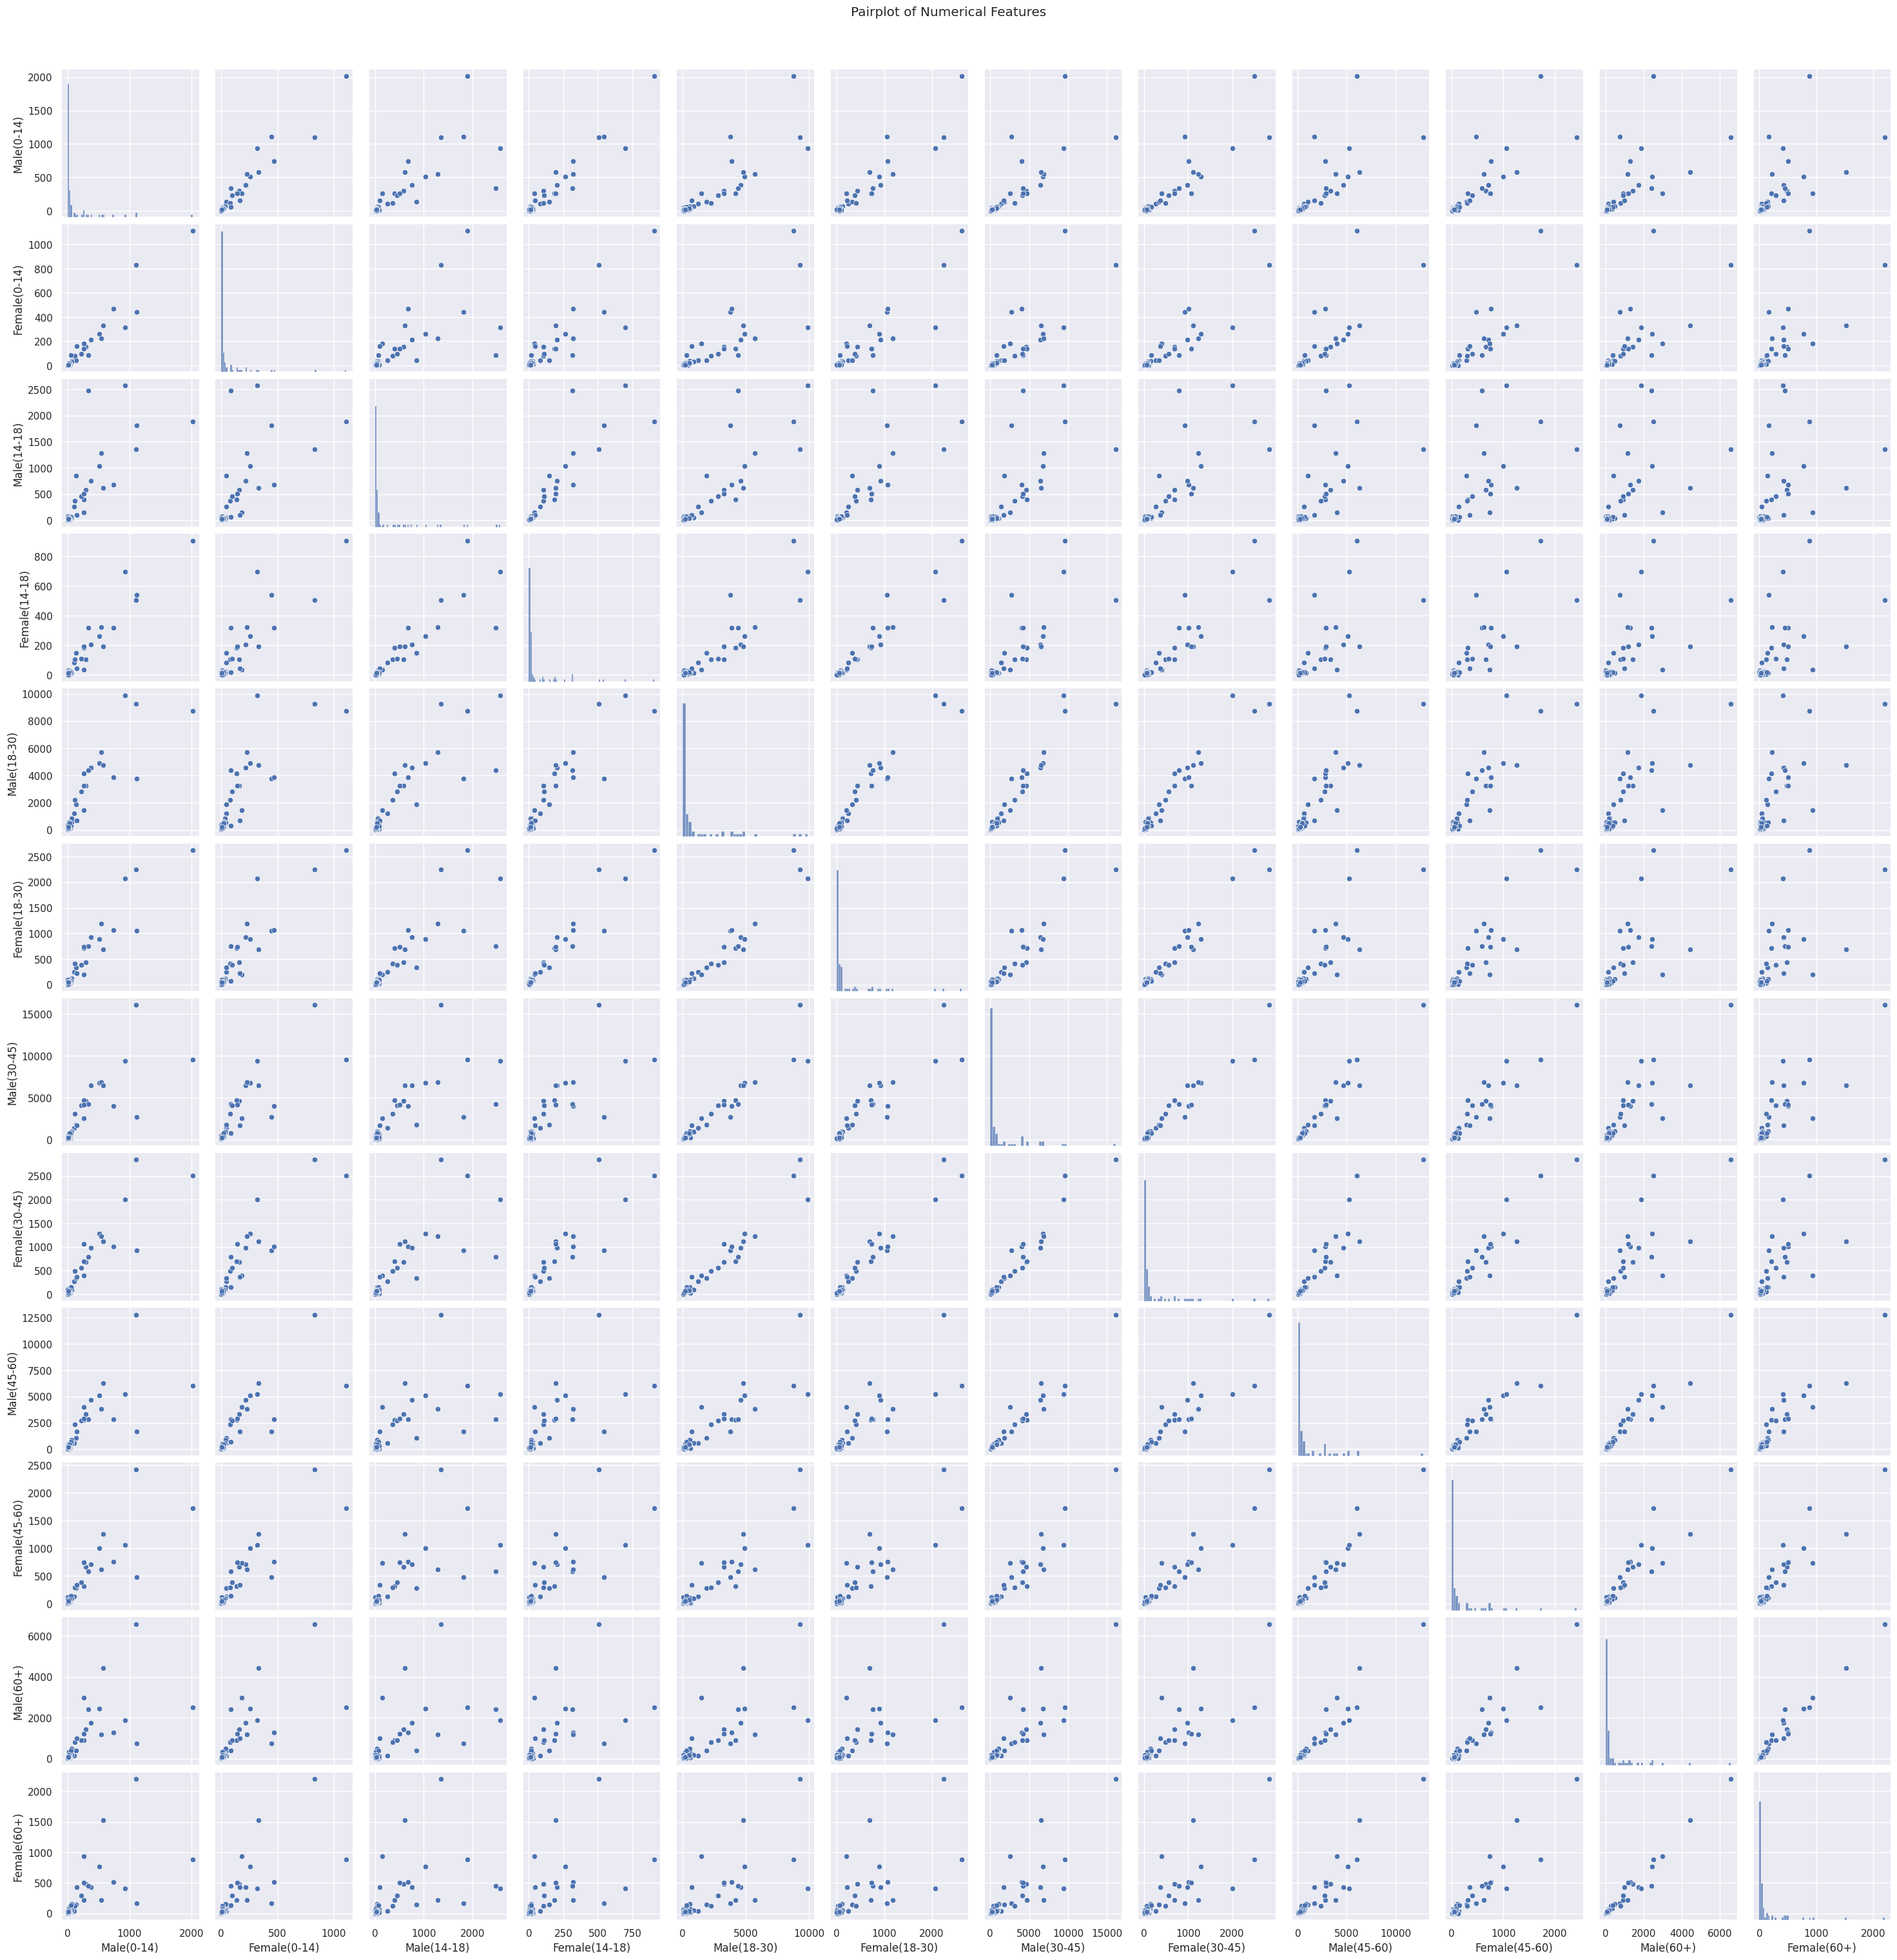

In [15]:
sns.pairplot(df.select_dtypes(include = np.number))
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

# Heatmap

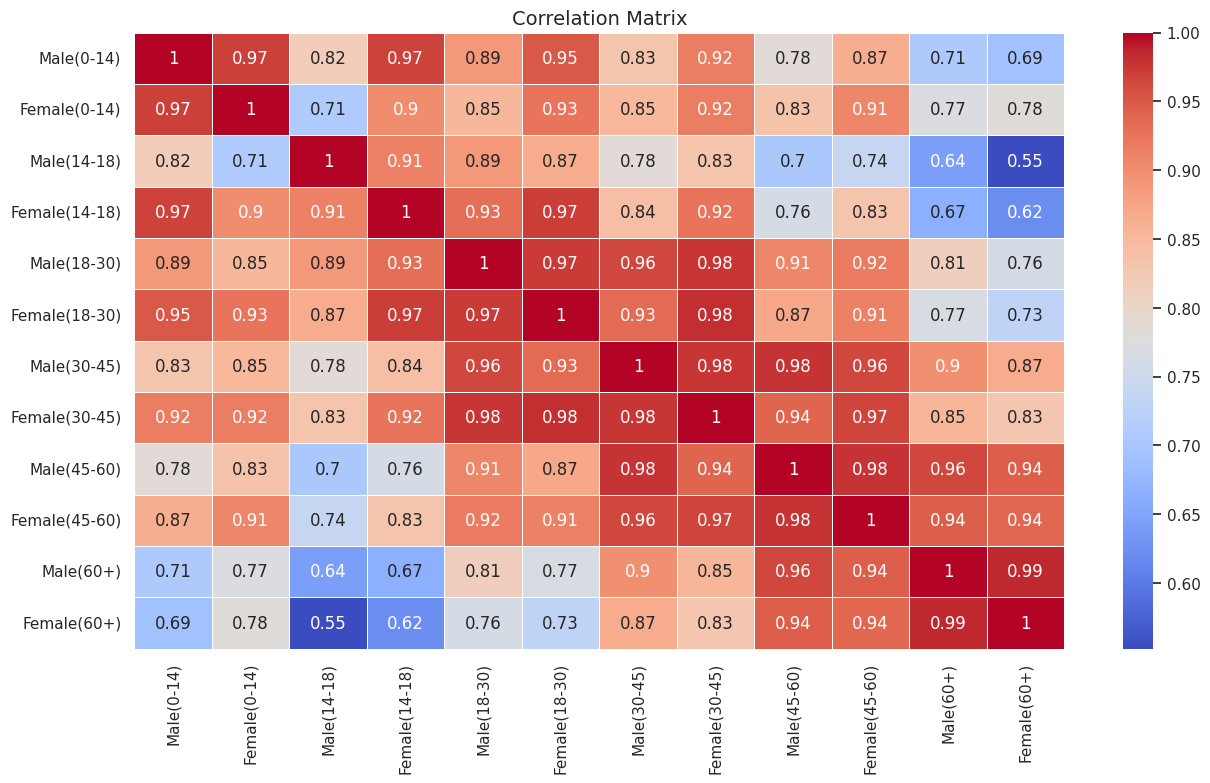

In [16]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=14)
plt.show()

# Statistical analysis

### Calculate Total Accidents per Region


In [17]:
accident_cols = [
    'Male(0-14)', 'Female(0-14)', 'Male(14-18)', 'Female(14-18)',
    'Male(18-30)', 'Female(18-30)', 'Male(30-45)', 'Female(30-45)',
    'Male(45-60)', 'Female(45-60)', 'Male(60+)', 'Female(60+)'
]

df['Total_Accidents_Region'] = df[accident_cols].sum(axis=1)

print("Added 'Total_Accidents_Region' column to the DataFrame.")
df.head()

Added 'Total_Accidents_Region' column to the DataFrame.


,Type,Region,Male(0-14),Female(0-14),Male(14-18),Female(14-18),Male(18-30),Female(18-30),Male(30-45),Female(30-45),Male(45-60),Female(45-60),Male(60+),Female(60+),Total_Accidents_Region
0,State,Andhra Pradesh,299,157,582,105,3268,437,4622,687,3324,662,1422,479,16044
1,State,Arunachal Pradesh,10,6,7,5,148,19,135,16,35,3,5,2,391
2,State,Assam,103,43,259,84,1234,250,1357,268,601,134,152,39,4524
3,State,Bihar,1113,444,1816,543,3777,1059,2679,922,1668,477,741,166,15405
4,State,Chhattisgarh,738,470,674,321,3876,1067,4006,1005,2814,763,1277,511,17522


## Calculate Total Accidents per Type

In [18]:
total_accidents_by_type = df.groupby('Type')['Total_Accidents_Region'].sum()
print("Total Accidents by Type (State, City, UT):\n")
print(total_accidents_by_type)

Total Accidents by Type (State, City, UT):

Type
City      53486
State    390988
UT         6509
Name: Total_Accidents_Region, dtype: int64


## Visualize Top Regions by Total Accidents



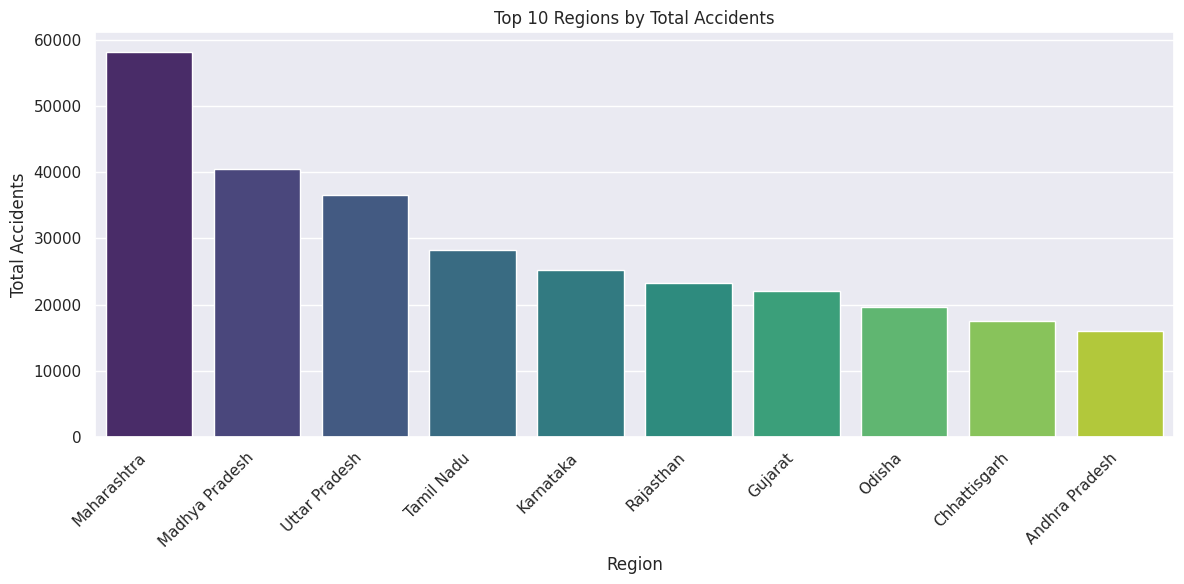

In [19]:
top_regions = df.groupby('Region')['Total_Accidents_Region'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_regions.index, y=top_regions.values, palette='viridis')
plt.title('Top 10 Regions by Total Accidents')
plt.xlabel('Region')
plt.ylabel('Total Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Visualize Total Accidents by Type


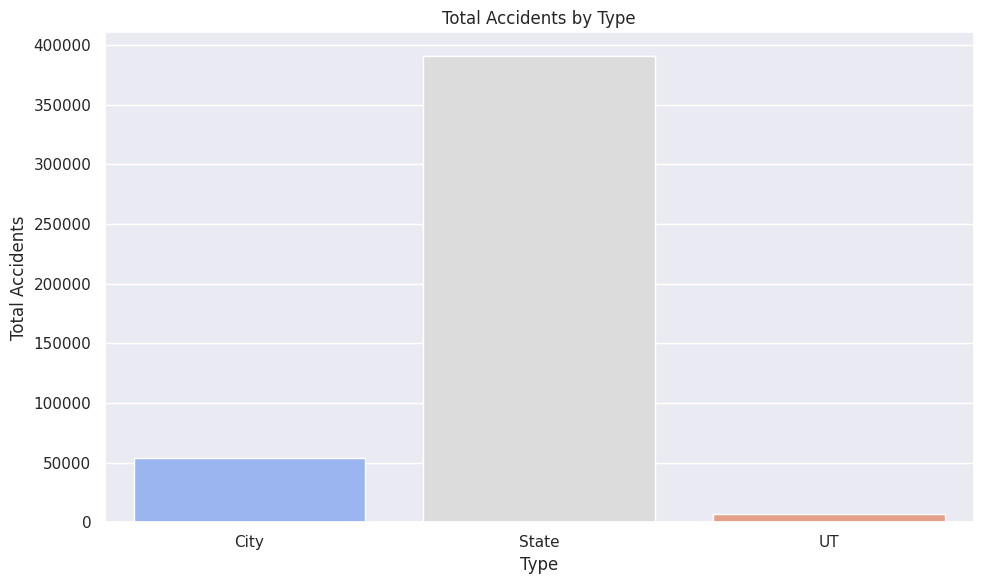

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x=total_accidents_by_type.index, y=total_accidents_by_type.values, palette='coolwarm')
plt.title('Total Accidents by Type')
plt.xlabel('Type')
plt.ylabel('Total Accidents')
plt.tight_layout()
plt.show()

In [21]:
male_cols = [col for col in df.columns if 'Male' in col]

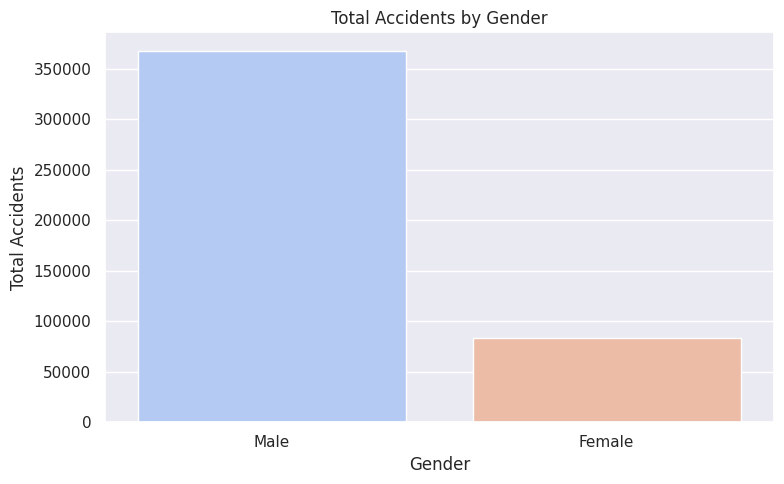

In [22]:
female_cols = [col for col in df.columns if 'Female' in col]

total_male_accidents = df[male_cols].sum().sum()
total_female_accidents = df[female_cols].sum().sum()

gender_accident_data = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'Total Accidents': [total_male_accidents, total_female_accidents]
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='Total Accidents', data=gender_accident_data, palette='coolwarm')
plt.title('Total Accidents by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Accidents')
plt.tight_layout()
plt.show()

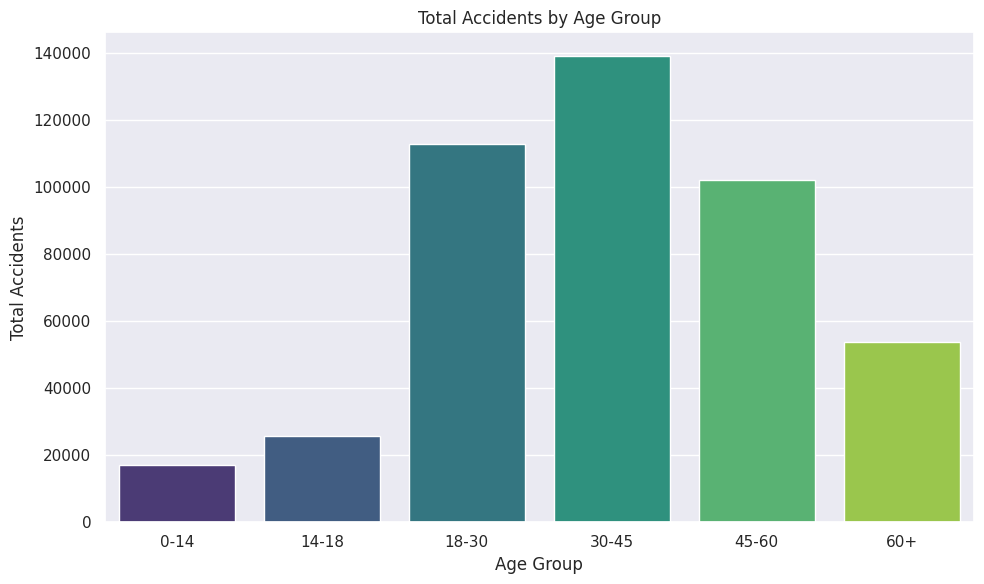

In [23]:
age_groups = {
    '0-14': ['Male(0-14)', 'Female(0-14)'],
    '14-18': ['Male(14-18)', 'Female(14-18)'],
    '18-30': ['Male(18-30)', 'Female(18-30)'],
    '30-45': ['Male(30-45)', 'Female(30-45)'],
    '45-60': ['Male(45-60)', 'Female(45-60)'],
    '60+': ['Male(60+)', 'Female(60+)']
}

total_accidents_by_age_group = {}
for age_group_name, cols in age_groups.items():
    total_accidents_by_age_group[age_group_name] = df[cols].sum().sum()

age_group_df = pd.DataFrame(list(total_accidents_by_age_group.items()), columns=['Age Group', 'Total Accidents'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Total Accidents', data=age_group_df, palette='viridis')
plt.title('Total Accidents by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Accidents')
plt.tight_layout()
plt.show()

--- 1. CALCULATING FATALITY RISK (LETHALITY INDEX) ---
Potential Fatal Columns found: []
⚠️ No 'Fatal' or 'Killed' columns found. Skipping Fatality Rate analysis.

--- 2. GENDER RISK ANALYSIS (T-TEST) ---
Average Male Involvement: 4133.6
Average Female Involvement: 933.6
P-Value: 4.0413e-04
✅ RESULT: The gender gap in accidents is Statistically Significant.


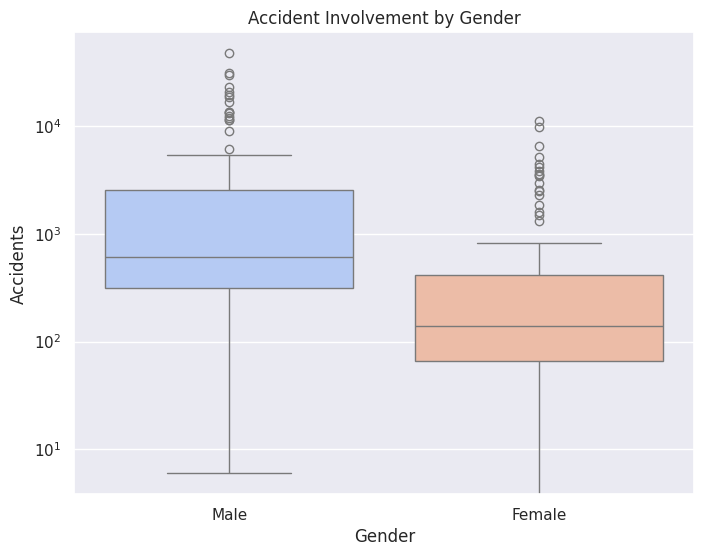

In [24]:
# ==========================================
# PHASE 2: ADVANCED SAFETY ANALYTICS
# ==========================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

print("--- 1. CALCULATING FATALITY RISK (LETHALITY INDEX) ---")
# We assume columns like 'Total_Accidents' and 'Fatal_Accidents' (or similar) exist.
# Let's verify column names first. If you have specific columns for 'Fatal', use them.
# Example assumption: 'Killed' or 'Fatal' in column names.

# Search for relevant columns
fatal_cols = [col for col in df.columns if 'Kill' in col or 'Fatal' in col or 'Death' in col]
print(f"Potential Fatal Columns found: {fatal_cols}")

if len(fatal_cols) > 0:
    # Create a 'Lethality Score' for each Region
    # Summing all fatal columns if multiple exist
    df['Total_Fatalities'] = df[fatal_cols].sum(axis=1)

    # Calculate Fatality Rate (Deaths per 100 Accidents)
    # Avoid division by zero
    df['Fatality_Rate'] = (df['Total_Fatalities'] / df['Total_Accidents']) * 100

    # Top 5 Most Dangerous Regions (Highest Fatality Rate, not just most accidents)
    dangerous_regions = df.groupby('Region')['Fatality_Rate'].mean().sort_values(ascending=False).head(5)

    print("\n🚨 TOP 5 MOST DANGEROUS REGIONS (Highest % of Deaths per Accident):")
    print(dangerous_regions)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=dangerous_regions.values, y=dangerous_regions.index, palette='Reds_r')
    plt.title('High Risk Zones: Where are accidents most deadly?')
    plt.xlabel('Fatality Rate (%)')
    plt.show()
else:
    print("⚠️ No 'Fatal' or 'Killed' columns found. Skipping Fatality Rate analysis.")


print("\n--- 2. GENDER RISK ANALYSIS (T-TEST) ---")
# Hypothesis: Males are involved in significantly more accidents than Females.
# We need to compare the average accidents for Male columns vs Female columns.

male_cols = [col for col in df.columns if 'Male' in col]
female_cols = [col for col in df.columns if 'Female' in col]

if len(male_cols) > 0 and len(female_cols) > 0:
    # Summing to get Total Male/Female involvement per row
    male_accidents = df[male_cols].sum(axis=1)
    female_accidents = df[female_cols].sum(axis=1)

    t_stat, p_val = stats.ttest_ind(male_accidents, female_accidents)

    print(f"Average Male Involvement: {male_accidents.mean():.1f}")
    print(f"Average Female Involvement: {female_accidents.mean():.1f}")
    print(f"P-Value: {p_val:.4e}")

    if p_val < 0.05:
        print("✅ RESULT: The gender gap in accidents is Statistically Significant.")
    else:
        print("❌ RESULT: No significant difference between genders (Unlikely).")

    # Visualization
    gender_df = pd.DataFrame({'Gender': ['Male'] * len(male_accidents) + ['Female'] * len(female_accidents),
                              'Accidents': list(male_accidents) + list(female_accidents)})

    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Gender', y='Accidents', data=gender_df, palette='coolwarm')
    plt.title('Accident Involvement by Gender')
    plt.yscale('log') # Log scale because male numbers might be huge
    plt.show()

# Feature Engineering

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score

print("--- 1. FEATURE ENGINEERING (CREATING PREDICTORS) ---")

# 1. Target Variable: Fatality Rate (Death % per Accident)
# We assume 'Killed' or 'Fatal' exists. If not, we fall back to Total Accidents.
fatal_cols = [col for col in df.columns if 'Kill' in col or 'Fatal' in col or 'Death' in col]

if len(fatal_cols) > 0:
    df['Total_Fatalities'] = df[fatal_cols].sum(axis=1)
    # Avoid division by zero by adding a small epsilon
    df['Fatality_Rate'] = (df['Total_Fatalities'] / (df['Total_Accidents_Region'] + 1)) * 100
    target = 'Fatality_Rate'
    print(f"🎯 Target Set: Fatality_Rate (Predicting how deadly the accident is)")
else:
    # Fallback: Predict Total Accidents if no fatality data
    target = 'Total_Accidents_Region'
    print(f"🎯 Target Set: Total_Accidents_Region (Predicting volume)")

# 2. Gender Ratio Feature (Are male-heavy accidents deadlier?)
male_cols = [c for c in df.columns if 'Male' in c]
if len(male_cols) > 0:
    df['Male_Involvement'] = df[male_cols].sum(axis=1)
    df['Male_Ratio'] = df['Male_Involvement'] / (df['Total_Accidents_Region'] + 1)
else:
    df['Male_Ratio'] = 0

# 3. Frequency Encoding for Region/Type (Converting Names to Risk Scores)
# Instead of just "One-Hot Encoding" which creates too many columns,
# we map each Region to its 'Average Accident Count' (Historical Risk)
for col in ['Region', 'State', 'Type', 'Cause']: # Add relevant categorical cols
    if col in df.columns:
        risk_map = df.groupby(col)['Total_Accidents_Region'].mean()
        df[f'{col}_Risk_Score'] = df[col].map(risk_map)

print("✅ Features Created: [Male_Ratio, Region_Risk_Score, Type_Risk_Score]")

--- 1. FEATURE ENGINEERING (CREATING PREDICTORS) ---
🎯 Target Set: Total_Accidents_Region (Predicting volume)
✅ Features Created: [Male_Ratio, Region_Risk_Score, Type_Risk_Score]


# Machine Learning


--- 2. TRAINING THE MODEL (RANDOM FOREST) ---

--- 3. MODEL PERFORMANCE REPORT ---
Model: Risk Predictor (Random Forest)
💰 Average Error (MAE): 875.35
🎯 Accuracy (R2 Score): 98.2%


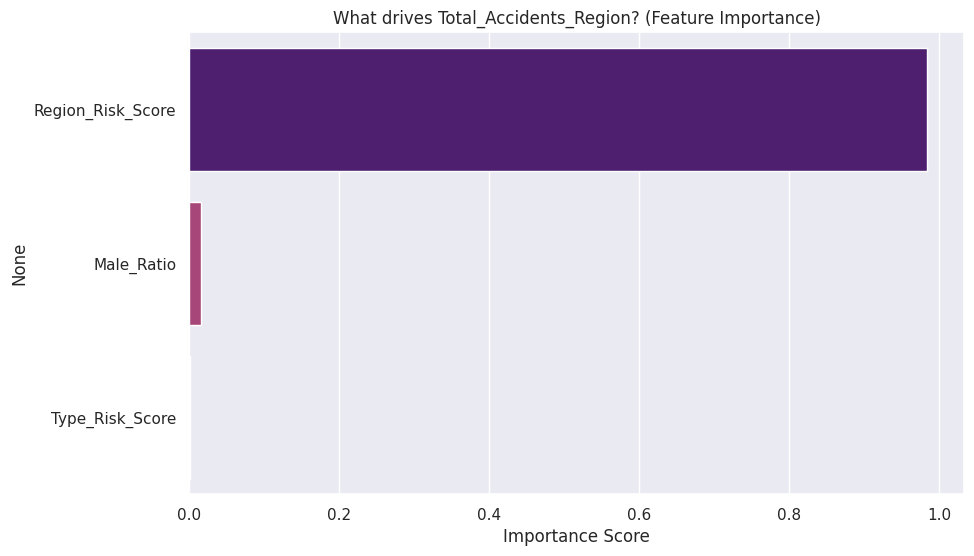

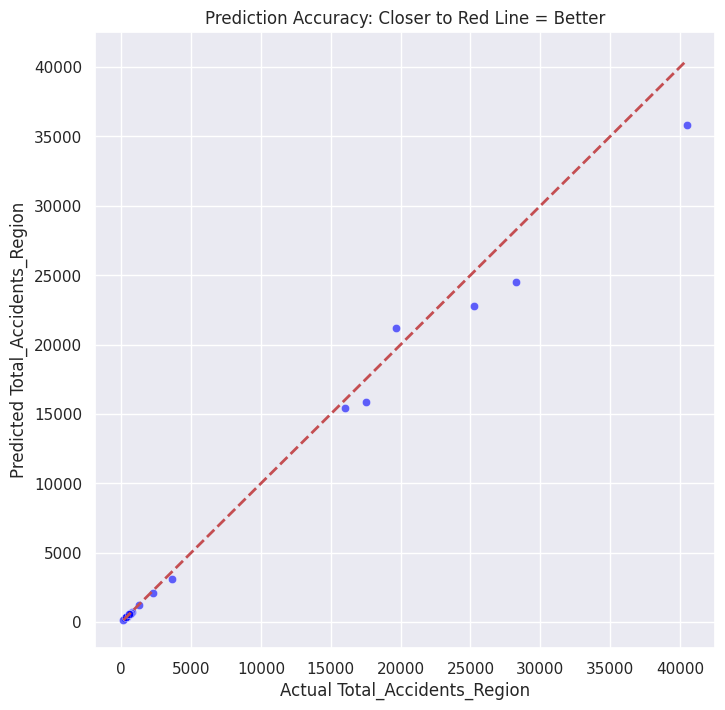

In [28]:
print("\n--- 2. TRAINING THE MODEL (RANDOM FOREST) ---")

# Prepare Data
# Select numeric columns only for ML
features = ['Male_Ratio'] + [c for c in df.columns if 'Risk_Score' in c]

# If 'Total_Accidents_Region' is supposed to be a feature AND not the target, add it here
# Based on previous instruction, 'Total_Accidents_Region' is the target
# If target is 'Total_Accidents_Region', it should not be in features list if we are predicting it.

# We drop the Target from the Features list - this is now handled by how `features` is defined.

# Create a new DataFrame `df_ml` containing only the selected features and the target variable, and drop any rows with missing values.
df_ml = df[features + [target]].dropna()

X = df_ml[features]
y = df_ml[target]

# Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Risk Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
preds = rf.predict(X_test)

print("\n--- 3. MODEL PERFORMANCE REPORT ---")
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print(f"Model: Risk Predictor (Random Forest)")
print(f"💰 Average Error (MAE): {mae:.2f}")
print(f"🎯 Accuracy (R2 Score): {r2*100:.1f}%")

# Feature Importance Visualization
importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index, palette='magma')
plt.title(f'What drives {target}? (Feature Importance)')
plt.xlabel('Importance Score')
plt.show()

# Actual vs Predicted Plot
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=preds, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Perfect line
plt.xlabel(f'Actual {target}')
plt.ylabel(f'Predicted {target}')
plt.title('Prediction Accuracy: Closer to Red Line = Better')
plt.show()